LIBRARY YANG DIBUTUHKAN

pip install opencv-python

pip install numpy

pip install pandas

pip install matplotlib

pip install tensorflow

pip install scikit-learn


In [ ]:
# Import semua library yang dibutuhkan
import os  # Mengimpor modul os untuk berinteraksi dengan sistem operasi
import cv2  # Mengimpor modul cv2 untuk operasi citra
import numpy as np  # Mengimpor modul numpy untuk operasi numerik
import pandas as pd  # Mengimpor modul pandas untuk manipulasi data tabular
import matplotlib.pyplot as plt  # Mengimpor modul matplotlib untuk visualisasi data

from tensorflow.keras.models import Sequential  # Mengimpor kelas Sequential dari TensorFlow
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer


In [ ]:
# Path ke dataset
dataset_path = '/content/drive/MyDrive/Visi Komputer/FinalProject Computer Vision/dataset'  # Ganti sesuai lokasi dataset
csv_path = os.path.join(dataset_path, '/content/drive/MyDrive/Visi Komputer/FinalProject Computer Vision/labels_FaceMask.csv')

# Baca file CSV
labels_df = pd.read_csv(csv_path)
print(labels_df)


   ClassId               Name
0        0  Without Face Mask
1        1     With Face Mask


In [ ]:
# Fungsi untuk memuat gambar
def load_images(dataset_folder, csv_data):
    images = []
    labels = []

    for _, row in csv_data.iterrows():
        folder = str(row['ClassId'])  # Folder 0 atau 1
        img_folder = os.path.join(dataset_folder, folder)

        if os.path.exists(img_folder):
            for img_file in os.listdir(img_folder):
                img_path = os.path.join(img_folder, img_file)
                image = cv2.imread(img_path)

                if image is not None:
                    images.append(image)
                    labels.append(row['ClassId'])
    return images, labels

# Muat dataset
images, labels = load_images(dataset_path, labels_df)

print(f"Jumlah gambar yang dimuat: {len(images)}")
print(f"Label unik: {set(labels)}")


Jumlah gambar yang dimuat: 1376
Label unik: {0, 1}


In [ ]:
# Fungsi untuk preprocessing
def preprocess_images(images, target_size=(224, 224)):
    processed_images = []
    for img in images:
        img_resized = cv2.resize(img, target_size)  # Resize
        img_normalized = img_resized / 255.0       # Normalisasi
        processed_images.append(img_normalized)
    return np.array(processed_images)

# Preprocessing
X = preprocess_images(images)
y = np.array(labels)

print(f"Shape gambar: {X.shape}")
print(f"Label: {y[:10]}")


Shape gambar: (1376, 224, 224, 3)
Label: [0 0 0 0 0 0 0 0 0 0]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {len(X_train)}, Testing data: {len(X_test)}")


Training data: 1100, Testing data: 276


In [ ]:
# Model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 kelas
])

# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Latih model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.5867 - loss: 3.3270 - val_accuracy: 0.9275 - val_loss: 0.2025
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step - accuracy: 0.9387 - loss: 0.1859 - val_accuracy: 0.9529 - val_loss: 0.1059
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.9692 - loss: 0.0919 - val_accuracy: 0.9819 - val_loss: 0.0705
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.9818 - loss: 0.0614 - val_accuracy: 0.9855 - val_loss: 0.0699
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.9831 - loss: 0.0483 - val_accuracy: 0.9710 - val_loss: 0.0717
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.9907 - loss: 0.0365 - val_accuracy: 0.9638 - val_loss: 0.0960
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.9958 - loss: 0.0263 - val_accuracy: 0.9746 - val_loss: 0.0620
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.9938 - loss: 0.0332 - val_accuracy: 0.9710 - v

In [ ]:
# Simpan model
model.save('/content/mask_detector.keras')  # Tambahkan ekstensi .keras
print("Model berhasil disimpan!")

Model berhasil disimpan!


9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9678 - loss: 0.0609
Akurasi: 96.38%


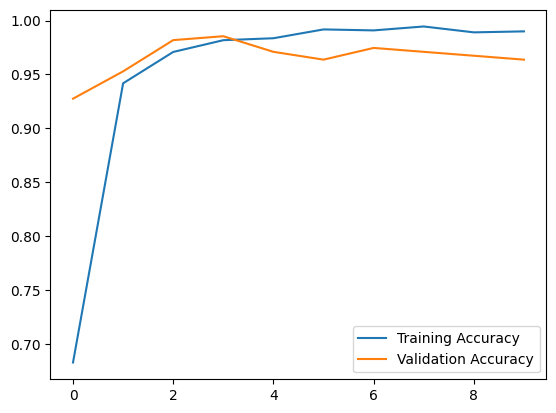

In [ ]:
# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi: {accuracy*100:.2f}%")
from sklearn.metrics import classification_report, confusion_matrix

# Plot hasil pelatihan
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


**PREDIKSI DENGAN BOUNDING BOX**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


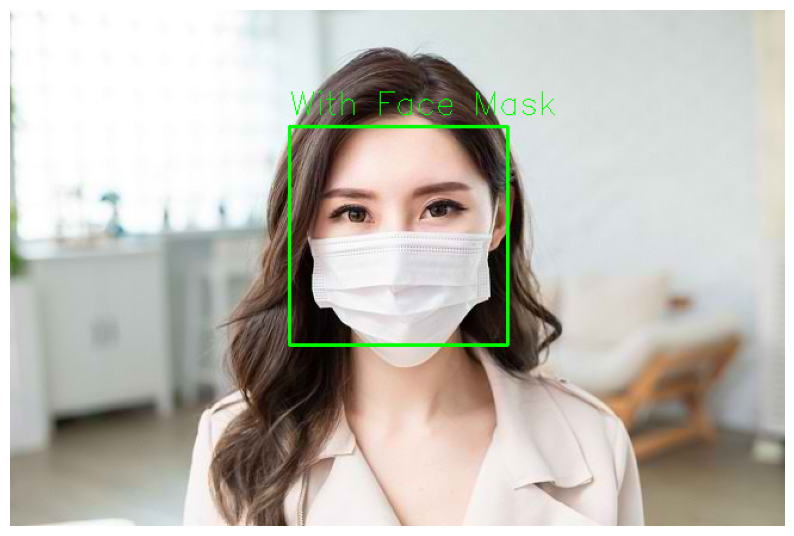

In [ ]:
# Fungsi prediksi dengan bounding box
def predict_and_display_with_bbox(model, img_path, face_cascade_path='haarcascade_frontalface_default.xml'):
    # Load Haar Cascade untuk deteksi wajah
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + face_cascade_path)

    # Baca gambar input
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Konversi ke grayscale untuk deteksi wajah

    # Dapatkan dimensi gambar
    img_height, img_width = image.shape[:2]

    # Deteksi wajah
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Proses setiap wajah
    for (x, y, w, h) in faces:
        # Potong ROI wajah
        face_roi = image[y:y+h, x:x+w]
        face_resized = cv2.resize(face_roi, (224, 224)) / 255.0
        face_resized = np.expand_dims(face_resized, axis=0)

        # Prediksi menggunakan model deteksi masker
        prediction = model.predict(face_resized)
        class_id = np.argmax(prediction)

        # Map prediksi ke label
        class_labels = {0: "Without Face Mask", 1: "With Face Mask"}
        prediction_label = class_labels[class_id]

        # Gambar bounding box dan label
        color = (0, 255, 0) if class_id == 1 else (0, 0, 255)  # Hijau untuk masker, Merah untuk tidak masker
        cv2.rectangle(image, (x, y), (x+w, y+h), color, 2)

        # Sesuaikan ukuran font dan ketebalan garis berdasarkan ukuran bounding box
        font_scale = max(0.5, min(w / 200, 1.5))  # Skala font berdasarkan lebar wajah
        thickness = max(1, int(w / 200))  # Ketebalan garis
        text_size = cv2.getTextSize(prediction_label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]

        # Tempatkan label di atas bounding box
        text_x = x
        text_y = max(y - 10, 10)  # Pastikan teks tidak keluar dari gambar
        cv2.putText(image, prediction_label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, color, thickness)

    # Tampilkan gambar dengan bounding box
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Contoh prediksi dan visualisasi
sample_image_path = '/content/drive/MyDrive/Visi Komputer/masker.jpg'  # Ganti dengan path gambar Anda
predict_and_display_with_bbox(model, sample_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


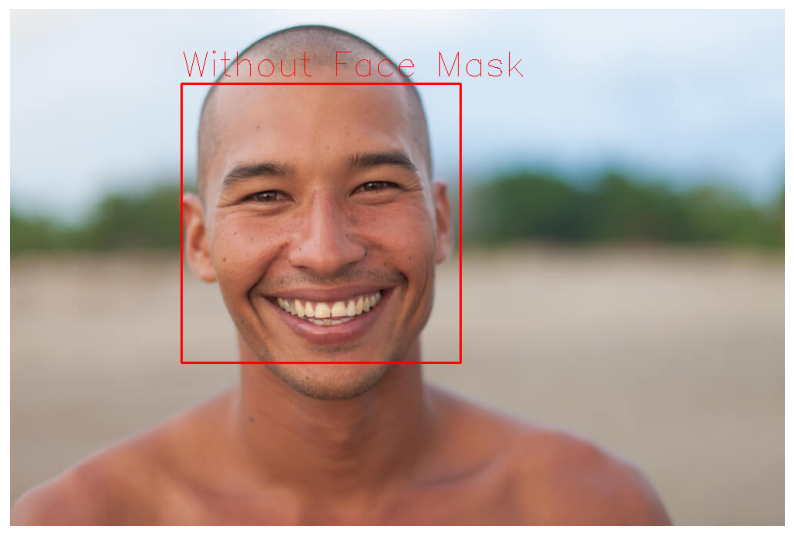

In [ ]:
# Fungsi prediksi dengan bounding box
def predict_and_display_with_bbox(model, img_path, face_cascade_path='haarcascade_frontalface_default.xml'):
    # Load Haar Cascade untuk deteksi wajah
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + face_cascade_path)

    # Baca gambar input
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Konversi ke grayscale untuk deteksi wajah

    # Dapatkan dimensi gambar
    img_height, img_width = image.shape[:2]

    # Deteksi wajah
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Proses setiap wajah
    for (x, y, w, h) in faces:
        # Potong ROI wajah
        face_roi = image[y:y+h, x:x+w]
        face_resized = cv2.resize(face_roi, (224, 224)) / 255.0
        face_resized = np.expand_dims(face_resized, axis=0)

        # Prediksi menggunakan model deteksi masker
        prediction = model.predict(face_resized)
        class_id = np.argmax(prediction)

        # Map prediksi ke label
        class_labels = {0: "Without Face Mask", 1: "With Face Mask"}
        prediction_label = class_labels[class_id]

        # Gambar bounding box dan label
        color = (0, 255, 0) if class_id == 1 else (0, 0, 255)  # Hijau untuk masker, Merah untuk tidak masker
        cv2.rectangle(image, (x, y), (x+w, y+h), color, 2)

        # Sesuaikan ukuran font dan ketebalan garis berdasarkan ukuran bounding box
        font_scale = max(0.5, min(w / 200, 1.5))  # Skala font berdasarkan lebar wajah
        thickness = max(1, int(w / 200))  # Ketebalan garis
        text_size = cv2.getTextSize(prediction_label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]

        # Tempatkan label di atas bounding box
        text_x = x
        text_y = max(y - 10, 10)  # Pastikan teks tidak keluar dari gambar
        cv2.putText(image, prediction_label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, color, thickness)

    # Tampilkan gambar dengan bounding box
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Contoh prediksi dan visualisasi
sample_image_path = '/content/drive/MyDrive/Visi Komputer/uji coba no makser.jpg'  # Ganti dengan path gambar Anda
predict_and_display_with_bbox(model, sample_image_path)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')